In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_df = city_df.merge(ride_df.groupby('city')['fare'].sum().reset_index(), how='outer', on='city')
city_df = city_df.merge(ride_df.groupby('city')['ride_id'].count().reset_index(), how='outer', on='city')
city_df = city_df.rename(columns={'city':'City',
                                  'driver_count': 'Driver Count',
                                  'type': 'Type',
                                  'fare':'Total Fares', 
                                  'ride_id': 'Rider Count'})
# Display the data table for preview
city_df.head(10)

,City,Driver Count,Type,Total Fares,Rider Count
0,Richardfort,38,Urban,626.45,28
1,Williamsstad,59,Urban,560.33,23
2,Port Angela,67,Urban,452.90,19
3,Rodneyfort,34,Urban,658.19,23
4,West Robert,39,Urban,778.84,31
5,West Anthony,70,Urban,742.10,30
6,West Angela,48,Urban,1013.61,39
7,Martinezhaven,25,Urban,543.63,24
8,Karenberg,22,Urban,447.78,17
9,Barajasview,26,Urban,557.31,22


In [2]:
# Calculate Market Size: Sum of Collected Fare Revenue
market_size = city_df['Total Fares'].sum()
print(f'Total Collected Fares: {market_size}')

Total Collected Fares: 63538.64


In [3]:
city_df['Average Fees'] = round(city_df['Total Fares']/city_df['Rider Count'], 2)
city_df['Market Share'] = round((city_df['Total Fares']/market_size)*100, 2)
city_df.head(25)

,City,Driver Count,Type,Total Fares,Rider Count,Average Fees,Market Share
0,Richardfort,38,Urban,626.45,28,22.37,0.99
1,Williamsstad,59,Urban,560.33,23,24.36,0.88
2,Port Angela,67,Urban,452.90,19,23.84,0.71
3,Rodneyfort,34,Urban,658.19,23,28.62,1.04
4,West Robert,39,Urban,778.84,31,25.12,1.23
5,West Anthony,70,Urban,742.10,30,24.74,1.17
6,West Angela,48,Urban,1013.61,39,25.99,1.60
7,Martinezhaven,25,Urban,543.63,24,22.65,0.86
8,Karenberg,22,Urban,447.78,17,26.34,0.70
9,Barajasview,26,Urban,557.31,22,25.33,0.88


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


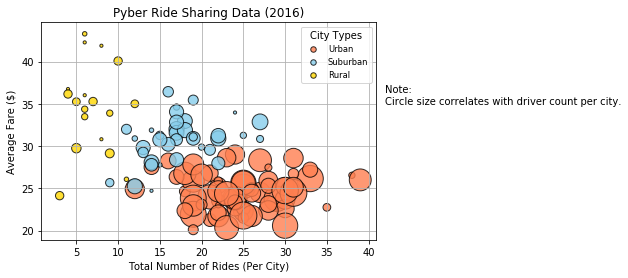

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [16]:
# Calculate Type Percents
total_fares_by_type = city_df.groupby('Type')['Market Share'].sum().reset_index()
total_fares_by_type.head()

,Type,Market Share
0,Rural,6.81
1,Suburban,30.46
2,Urban,62.76


In [15]:
type(total_fares_by_type)

pandas.core.series.Series

(-1.1189426046220687,
 1.2441418900365244,
 -1.113414495124131,
 1.184953829229802)

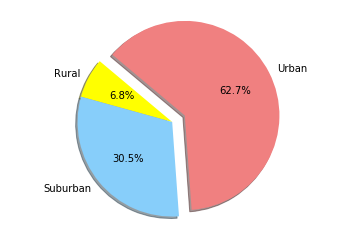

In [30]:
# Build Pie Chart
colors = ['yellow', 'lightskyblue', 'lightcoral']
plt.pie(total_fares_by_type['Market Share'], explode=(0,0,.15), labels=total_fares_by_type['Type'], colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
# Save Figure
#fig_save_path = 'Saved Charts/TotalFaresByType.png'

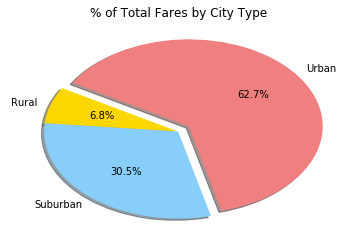

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [33]:
total_rides = city_df['Rider Count'].sum()
total_rides
# Calculate Ride Percents

# Build Pie Chart
city_df['Ride Share'] = round((city_df['Rider Count']/total_rides)*100, 2)
ride_share_by_type = city_df.groupby('Type')['Ride Share'].sum().reset_index()
ride_share_by_type.head()

# Save Figure


,Type,Ride Share
0,Rural,5.26
1,Suburban,26.36
2,Urban,68.42


(-1.1110712775075706,
 1.2154407222681591,
 -1.0855516897406983,
 1.1463209595178612)

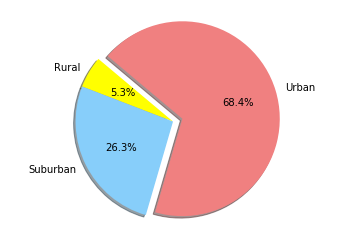

In [37]:
plt.pie(ride_share_by_type['Ride Share'], explode=(0, 0, .1), labels=ride_share_by_type['Type'], colors=colors, autopct="%1.1f%%",shadow=True, startangle=140)
plt.axis('equal')

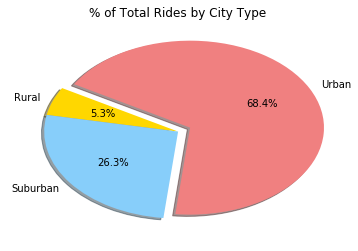

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


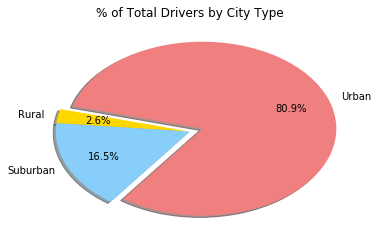

In [6]:
# Show Figure
plt.show()